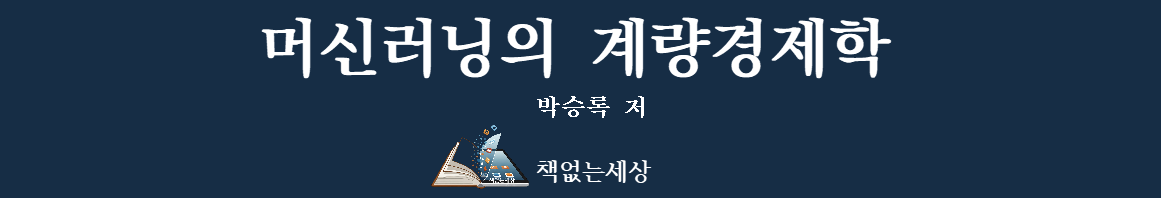

# Part 6: 패널 모형

## Chapter 1: 시계열 자료와 횡단면 자료의 혼용

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [2]:
# exec(open('X:/Econometrics_with_ML/Functions/Traditional_Econometrics_Lib.py').read())

In [3]:
# 전통적 계량경제학에서 자주 사용되는 라이브러리(Libraries for the Analysis of Traditional Econometrics)
# Call this file 
# "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# "%run –i Functions/Traditional_Econometrics_Lib.py"
# "from Functions.Traditional_Econometrics_Lib import * "
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random
from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model
import wooldridge as woo
import wbdata
import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

### 4. 파이썬에서 횡단면 자료와 시계열 자료의 혼용자료
#### 가. 풀링 횡단면 자료: 더미 변수와 그 교차항 

#### 교육의 임금 효과, 성별 임금격차

A data.frame with 1084 observations on 15 variables:
* educ: years of schooling
* south: =1 if live in south
* nonwhite: =1 if nonwhite
* female: =1 if female
* married: =1 if married
* exper: age - educ - 6
* expersq: exper^2
* union: =1 if belong to union
* lwage: log hourly wage
* age: in years
* year: 78 or 85
* y85: =1 if year == 85
* y85fem: y85*female
* y85educ: y85*educ
* y85union: y85*union


In [4]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

df = woo.dataWoo('cps78_85')
print(df)
print(df.describe())
print(df.info())

# 연도 더미변수와의 교차항을 포함한 OLS
reg = smf.ols(formula='lwage ~ y85*(educ+female) + exper +'
                      'I(exper**2) + union',
              data=df)
results = reg.fit()
print(results.summary())


      educ  south  nonwhite  female  married  exper  expersq  union   lwage  \
0       12      0         0       0        0      8       64      0  1.2150   
1       12      0         0       1        1     30      900      1  1.6094   
2        6      0         0       0        1     38     1444      1  2.1401   
3       12      0         0       0        1     19      361      1  2.0732   
4       12      0         0       0        1     11      121      0  1.6490   
...    ...    ...       ...     ...      ...    ...      ...    ...     ...   
1079    12      0         1       1        1     18      324      0  2.1552   
1080    14      0         0       1        0     13      169      0  2.9178   
1081    18      0         0       0        1      8       64      0  3.1001   
1082    12      0         1       0        0     14      196      1  2.7887   
1083    12      0         0       0        0      9       81      0  2.9689   

      age  year  y85  y85fem  y85educ  y85union  
0

### 나. 차이의 차이(Difference in Difference: DID)
##### 쓰레기 처리장 위치와 주택가격

 A data.frame with 321 observations on 25 variables:
* year: 1978 or 1981
* age: age of house
* agesq: age^2
* nbh: neighborhood, 1-6
* cbd: dist. to cent. bus. dstrct, ft.
* intst: dist. to interstate, ft.
* lintst: log(intst)
* price: selling price
* rooms: # rooms in house
* area: square footage of house
* land: square footage lot
* baths: # bathrooms
* dist: dist. from house to incin., ft.
* ldist: log(dist)
* wind: prc. time wind incin. to house
* lprice: log(price)
* y81: =1 if year == 1981
* larea: log(area)
* lland: log(land)
* y81ldist: y81*ldist
* lintstsq: lintst^2
* nearinc: =1 if dist <= 15840
* y81nrinc: y81*nearinc
* rprice: price, 1978 dollars
* lrprice: log(rprice)


In [5]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

# DID
kielmc = woo.dataWoo('kielmc')

# 1978년과 1981년 분리하여 회귀분석
y78 = (kielmc['year'] == 1978)
reg78 = smf.ols(formula='rprice ~ nearinc', data=kielmc, subset=y78)
results78 = reg78.fit()
display(results78.summary())

y81 = (kielmc['year'] == 1981)
reg81 = smf.ols(formula='rprice ~ nearinc', data=kielmc, subset=y81)
results81 = reg81.fit()
display(results81.summary())

# 연도 더미 변수와의 교차항을 포함하는 회귀
reg_joint = smf.ols(formula='rprice ~ nearinc*C(year)', data=kielmc)
results_joint = reg_joint.fit()
display(results_joint.summary())

# DiD 모형
reg_did = smf.ols(formula='lrprice ~ nearinc*C(year)', data=kielmc)
results_did = reg_did.fit()
display(results_did.summary()) 

# 통제변수(control variables)를 가진 DID
formula= """lrprice ~ nearinc*C(year) + age + I(age**2) + np.log(intst) 
          + np.log(land) + np.log(area) + rooms + baths"""


reg_didC = smf.ols(formula=formula, data=kielmc)
results_didC = reg_didC.fit()
display(results_didC.summary()) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rprice   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     15.74
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           0.000105
Time:                        18:21:01   Log-Likelihood:                -2094.9
No. Observations:                 179   AIC:                             4194.
Df Residuals:                     177   BIC:                             4200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.252e+04   2653.790     31.094      0.000    7.73e+04    8.78e+04
nearinc    -1.882e+04   4744.594     -3.968      0.000   -2.82e+04   -9461.117
==============================================================================
Omnibus:                      173.455   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4526.710
Skew:                           3.520   Prob(JB):                         0.00
Kurtosis:                      26.609   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rprice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     27.73
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           5.14e-07
Time:                        18:21:01   Log-Likelihood:                -1670.1
No. Observations:                 142   AIC:                             3344.
Df Residuals:                     140   BIC:                             3350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.013e+05   3093.027     32.754      0.000    9.52e+04    1.07e+05
nearinc    -3.069e+04   5827.709     -5.266      0.000   -4.22e+04   -1.92e+04
==============================================================================
Omnibus:                       23.943   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.601
Skew:                           0.832   Prob(JB):                     4.15e-09
Kurtosis:                       4.939   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rprice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     22.25
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           4.22e-13
Time:                        18:21:01   Log-Likelihood:                -3765.2
No. Observations:                 321   AIC:                             7538.
Df Residuals:                     317   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8.252e+04   2726.910     30.260      0.000    7.72e+04    8.79e+04
C(year)[T.1981]          1.879e+04   4050.065      4.640      0.000    1.08e+04    2.68e+04
nearinc                 -1.882e+04   4875.322     -3.861      0.000   -2.84e+04   -9232.293
nearinc:C(year)[T.1981] -1.186e+04   7456.646     -1.591      0.113   -2.65e+04    2806.867
==============================================================================
Omnibus:                      192.562   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2462.071
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lrprice   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     34.47
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.62e-19
Time:                        18:21:01   Log-Likelihood:                -105.68
No. Observations:                 321   AIC:                             219.4
Df Residuals:                     317   BIC:                             234.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2854      0.031    369.839      0.000      11.225      11.345
C(year)[T.1981]             0.1931      0.045      4.261      0.000       0.104       0.282
nearinc                    -0.3399      0.055     -6.231      0.000      -0.447      -0.233
nearinc:C(year)[T.1981]    -0.0626      0.083     -0.751      0.453      -0.227       0.102
==============================================================================
Omnibus:                       29.462   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.380
Skew:                           0.370   Prob(JB):                     4.75e-19
Kurtosis:                       5.400   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lrprice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     84.91
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.24e-82
Time:                        18:21:01   Log-Likelihood:                 60.690
No. Observations:                 321   AIC:                            -99.38
Df Residuals:                     310   BIC:                            -57.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.6517      0.416     18.399      0.000       6.833       8.470
C(year)[T.1981]             0.1621      0.028      5.687      0.000       0.106       0.218
nearinc                     0.0322      0.047      0.679      0.498      -0.061       0.126
nearinc:C(year)[T.1981]    -0.1315      0.052     -2.531      0.012      -0.234      -0.029
age                        -0.0084      0.001     -5.924      0.000      -0.011      -0.006
I(age ** 2)              3.763e-05   8.67e-06      4.342      0.000    2.06e-05    5.47e-05
np.log(intst)              -0.0614      0.032     -1.950      0.052      -0.123       0.001
np.log(land)                0.0998      0.024      4.077      0.000       0.052       0.148
np.log(area)                0.3508      0.051      6.813      0.000       0.249       0.452
rooms                       0.0473      0.017      2.732      0.007       0.013       0.081
baths                       0.0943      0.028      3.400      0.001       0.040       0.149
==============================================================================
Omnibus:                       67.366   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.621
Skew:                          -0.734   Prob(JB):                     3.64e-78
Kurtosis:                       7.951   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""